<a href="https://colab.research.google.com/github/ibribr/ML/blob/master/perceptron_for_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# In this example we will use a perceptron from sklearn to classify three iris classes (setosa, versicolor, and virginica)
# upload python liberaries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [23]:
# upload your iris datset
iris = datasets.load_iris()
# select two features
x = iris.data[:,[2,3]]   # petal length and petal width
y = iris.target
print(np.unique(y))
print(iris.target_names)
print(iris.feature_names)

[0 1 2]
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [24]:
# standardize your feature vector
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
xstd=sc.transform(x)
print(x[1:2,:], xstd[1:2,:])

[[1.4 0.2]] [[-1.34022653 -1.3154443 ]]


In [25]:
#split dataset into training and testing sets
from sklearn.model_selection import train_test_split
x = xstd
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)

print(np.bincount(ytrain), np.bincount(ytest))

[35 35 35] [15 15 15]


In [30]:
# select a model for training
from sklearn.linear_model import Perceptron, LogisticRegression

model1 = Perceptron(max_iter=100, eta0=0.002, random_state=1)
model2 = LogisticRegression(max_iter=100, random_state=1, multi_class='ovr')

model1.fit(xtrain, ytrain)
model2.fit(xtrain, ytrain)

ypred1 = model1.predict(xtest)
ypred2 = model2.predict(xtest)

print(model1.score(xtest, ytest))
print(model2.score(xtest, ytest))

print('missclassified samples (Model1) = ', (ytest != ypred1).sum())
print('missclassified samples (Model2) = ', (ytest != ypred2).sum())

print('weights: \n', model1.coef_)
print('bias   : \n', model1.intercept_)

0.9555555555555556
0.9777777777777777
missclassified samples (Model1) =  2
missclassified samples (Model2) =  1
weights: 
 [[-0.00220757 -0.00237113]
 [ 0.00540865 -0.00210787]
 [ 0.00628849  0.00683785]]
bias   : 
 [-0.002 -0.002 -0.008]


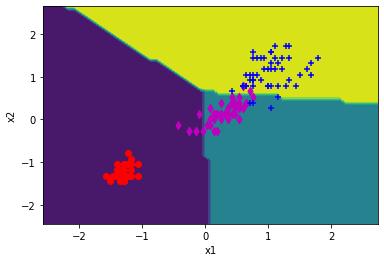

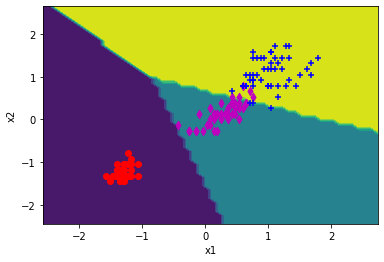

In [32]:
# plot decision regions in 2D space
def plot_decision_boundary(model):
  x1 = np.arange(x[:,0].min()-1, x[:,0].max()+1, 0.1)
  x2 = np.arange(x[:,1].min()-1, x[:,1].max()+1, 0.1)
  x1g, x2g = np.meshgrid(x1, x2)
  z = model.predict(np.array([x1g.flatten(), x2g.flatten()]).T)
  plt.figure()
  plt.contourf(x1g, x2g, z.reshape(x1g.shape))
  plt.scatter(x[y==0,0],x[y==0,1],color='red', marker='o')
  plt.scatter(x[y==1,0],x[y==1,1],color='m', marker='d')
  plt.scatter(x[y==2,0],x[y==2,1],color='blue', marker='+')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

plot_decision_boundary(model1)
plot_decision_boundary(model2)